In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.imputation import RandomSampleImputer
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('data/social_media_vs_productivity.csv')

In [17]:
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


# Exploratory Data Analysis

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [19]:
df.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,27235.000000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000.000000,30000.000000,30000.000000,27270.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,2.074813,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,1.410047,9.252956,7.280415,2.121194
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.639566,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,1.000000,8.000000,4.541872,3.363580
50%,41.000000,3.025913,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,2.000000,16.000000,10.013677,4.951049
75%,53.000000,4.368917,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,3.000000,24.000000,15.300809,6.581323
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


In [20]:
df.isnull().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

<Axes: >

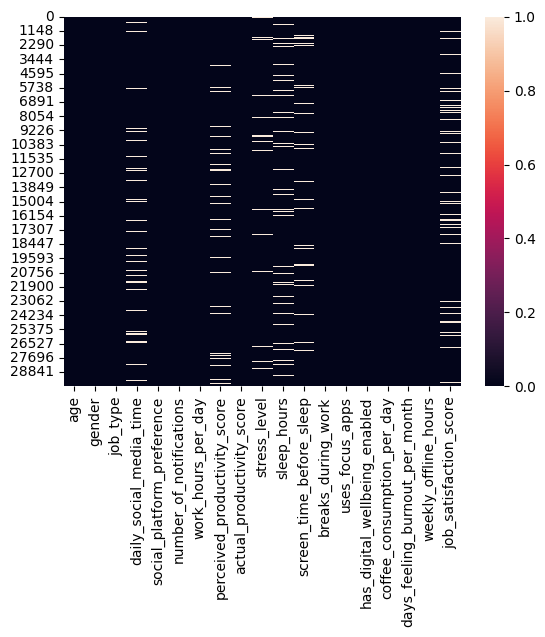

In [68]:
sns.heatmap(df.isnull())

Selecting numerical columns

In [22]:
num_cols = list(df.select_dtypes(['int64','float64']).columns)
num_cols

['age',
 'daily_social_media_time',
 'number_of_notifications',
 'work_hours_per_day',
 'perceived_productivity_score',
 'actual_productivity_score',
 'stress_level',
 'sleep_hours',
 'screen_time_before_sleep',
 'breaks_during_work',
 'coffee_consumption_per_day',
 'days_feeling_burnout_per_month',
 'weekly_offline_hours',
 'job_satisfaction_score']

Selecting non numerical columns

In [23]:
non_num_cols = list(df.select_dtypes(['object','bool']).columns)
non_num_cols

['gender',
 'job_type',
 'social_platform_preference',
 'uses_focus_apps',
 'has_digital_wellbeing_enabled']

Function for printing unique values of each non numerical column

In [24]:
def uniqueVals(cols):
    for col in cols:
        print(df[col].unique())

In [25]:
uniqueVals(non_num_cols)

['Male' 'Female' 'Other']
['Unemployed' 'Health' 'Finance' 'IT' 'Education' 'Student']
['Facebook' 'Twitter' 'Telegram' 'TikTok' 'Instagram']
[False  True]
[False  True]


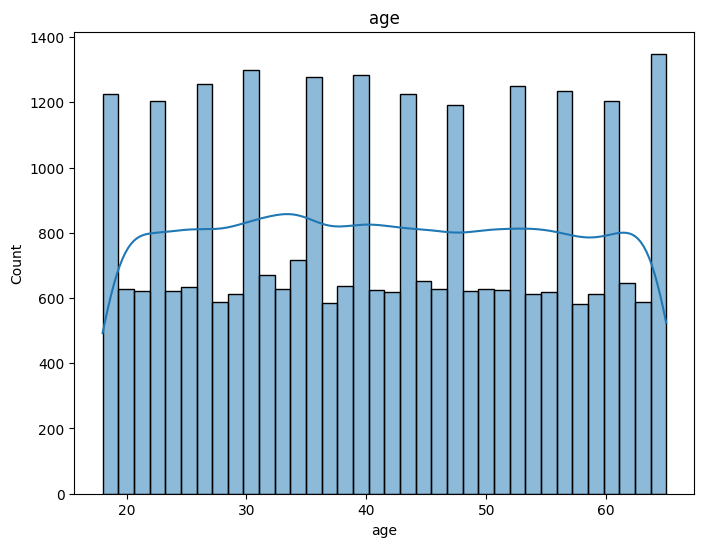

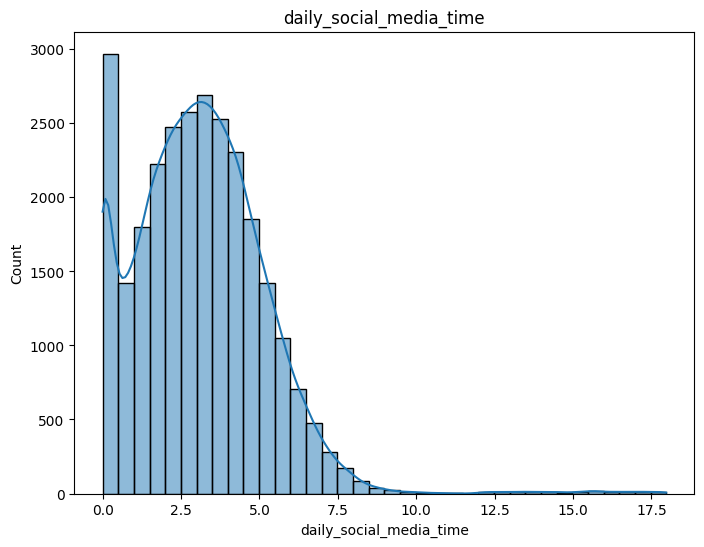

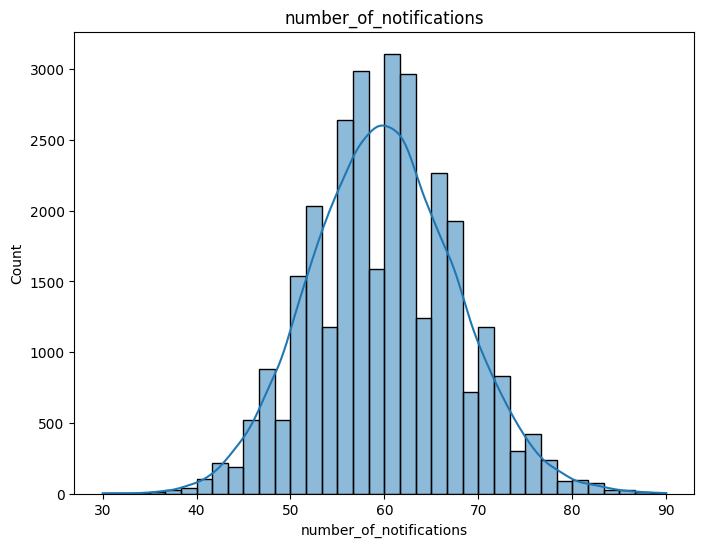

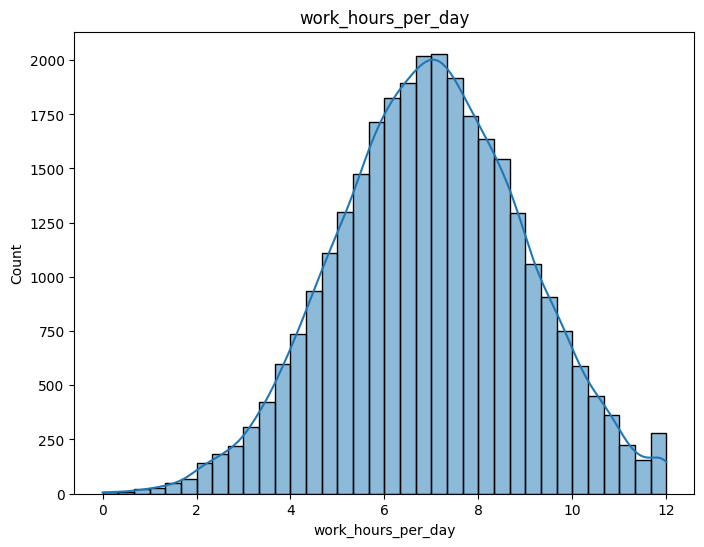

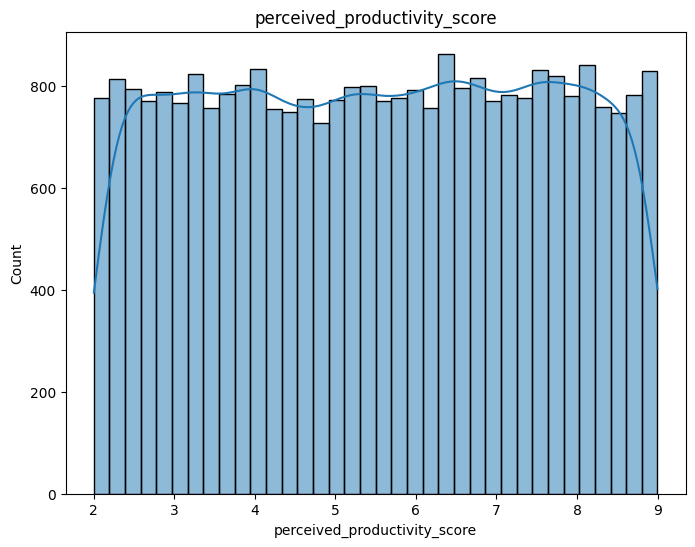

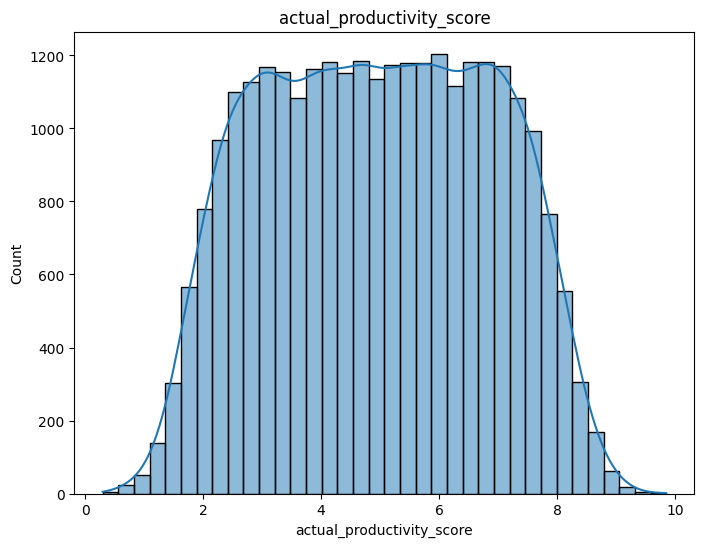

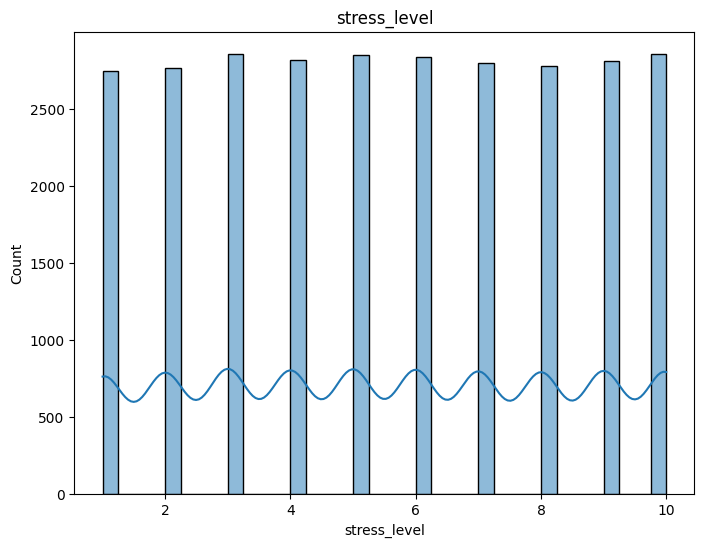

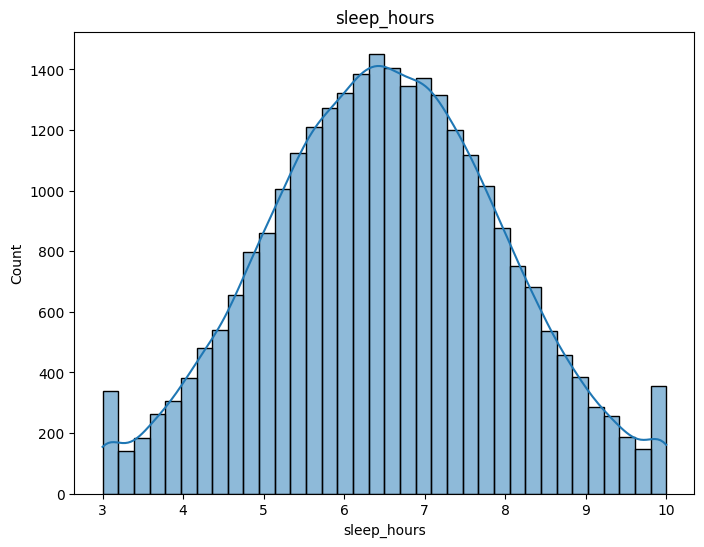

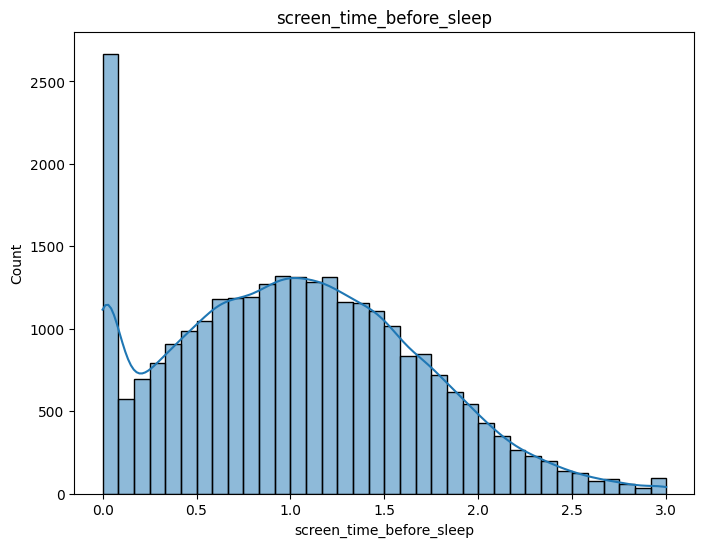

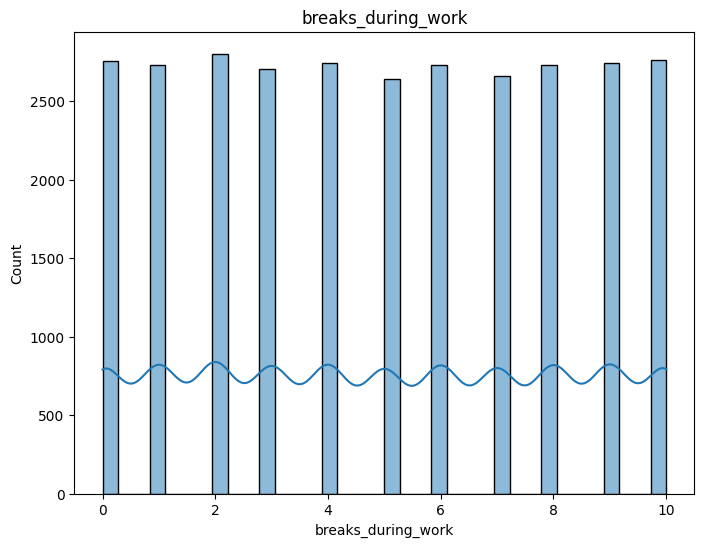

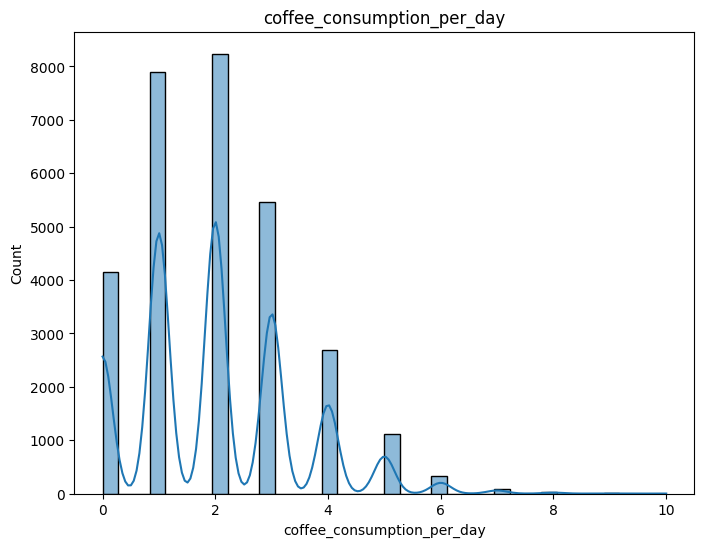

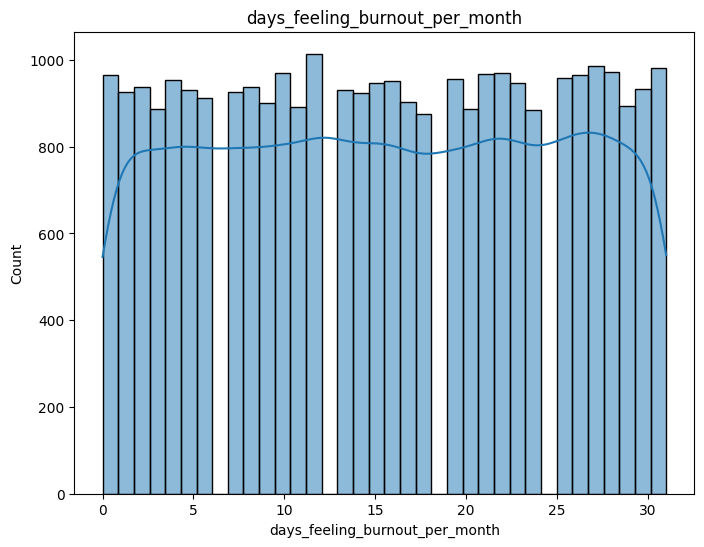

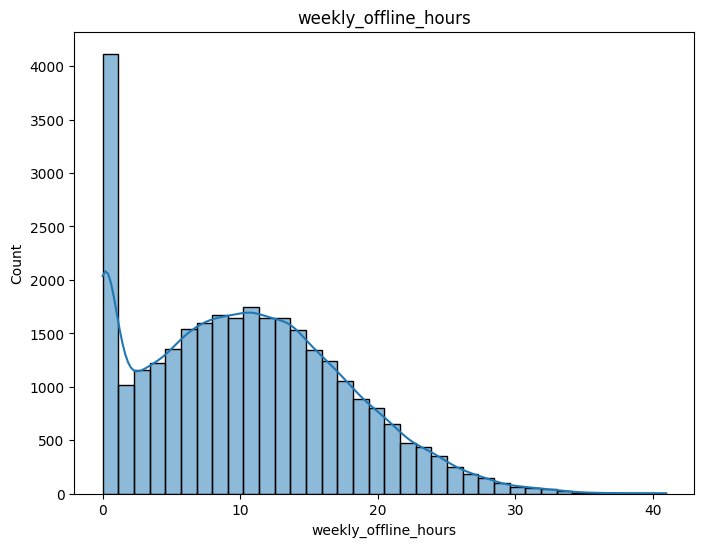

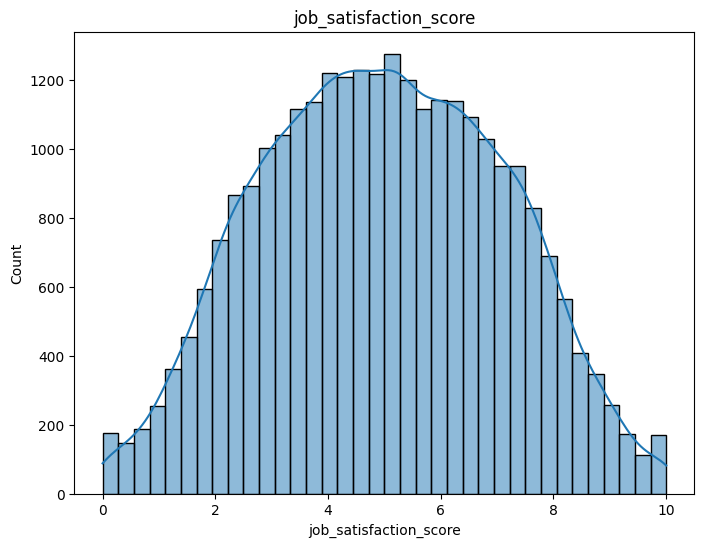

In [26]:
for col in num_cols:
    plt.figure(figsize = (8,6))
    sns.histplot(df[col], kde = True, bins = 36)
    plt.title(f'{col}')

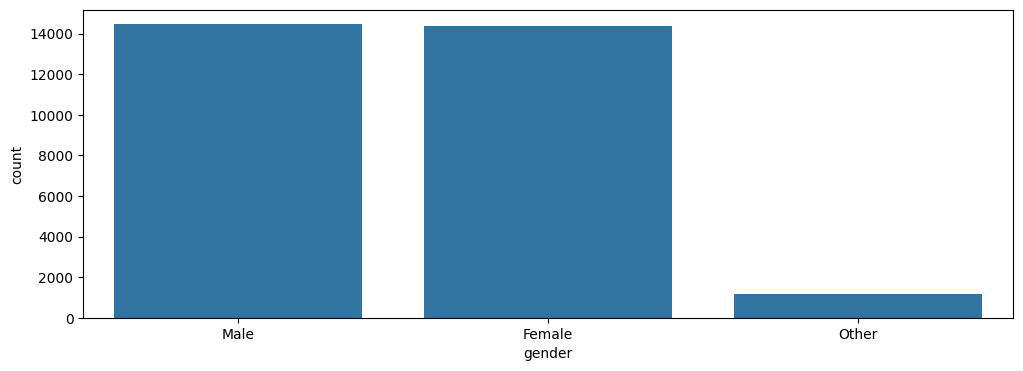

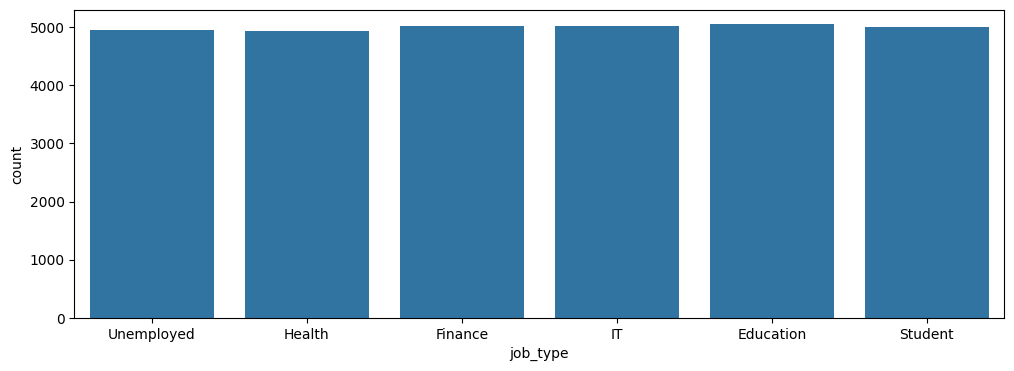

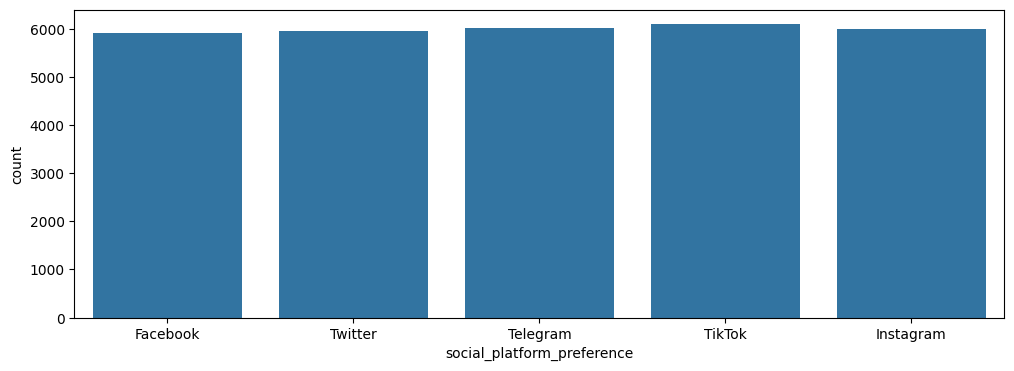

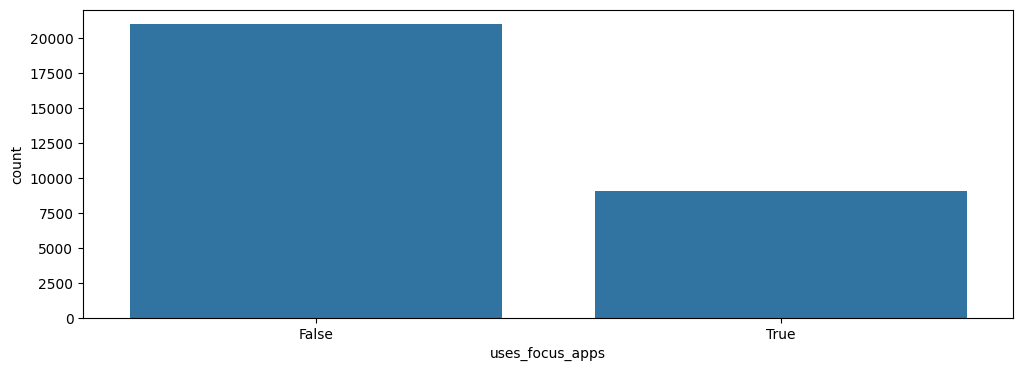

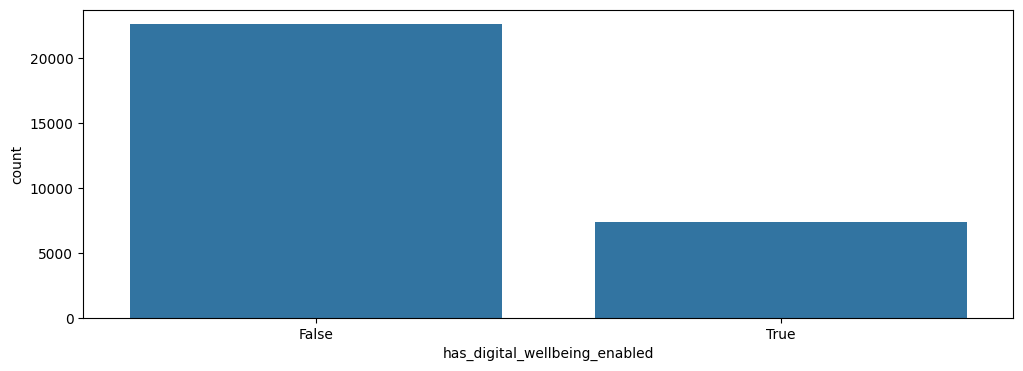

In [27]:
for col in non_num_cols:
    plt.figure(figsize = (12,4))
    sns.countplot(df, x = col)

Correlating numerical columns in a heatmap

<Axes: >

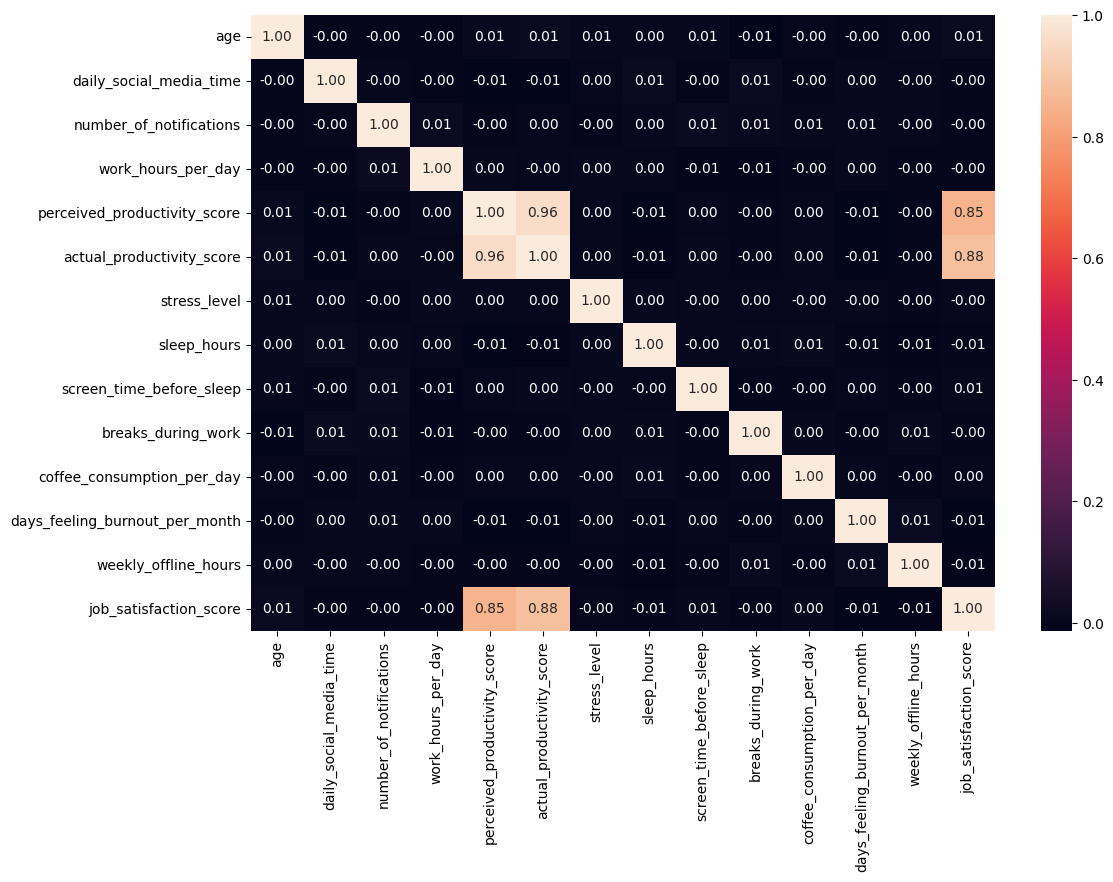

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f')

Notable correlations between various features with productivity score:
- **Age (positive correlation)** --> Productivity increasing with age. This might be related with experience and expertise gathered in the field of work over time.
- **Daily social media time (negative correlation)** --> Increase in daily social media time is seen to decrease productivity score
- **Sleep hours (negative correlation)** --> Increase in sleep deprivation is seen to decrease productivity score
- **Burnout days per month (negative correlation)** --> Increase in days where people feel burnt out is seen to decrease productivity score

Comparing non-numerical attributes with productivity sccore

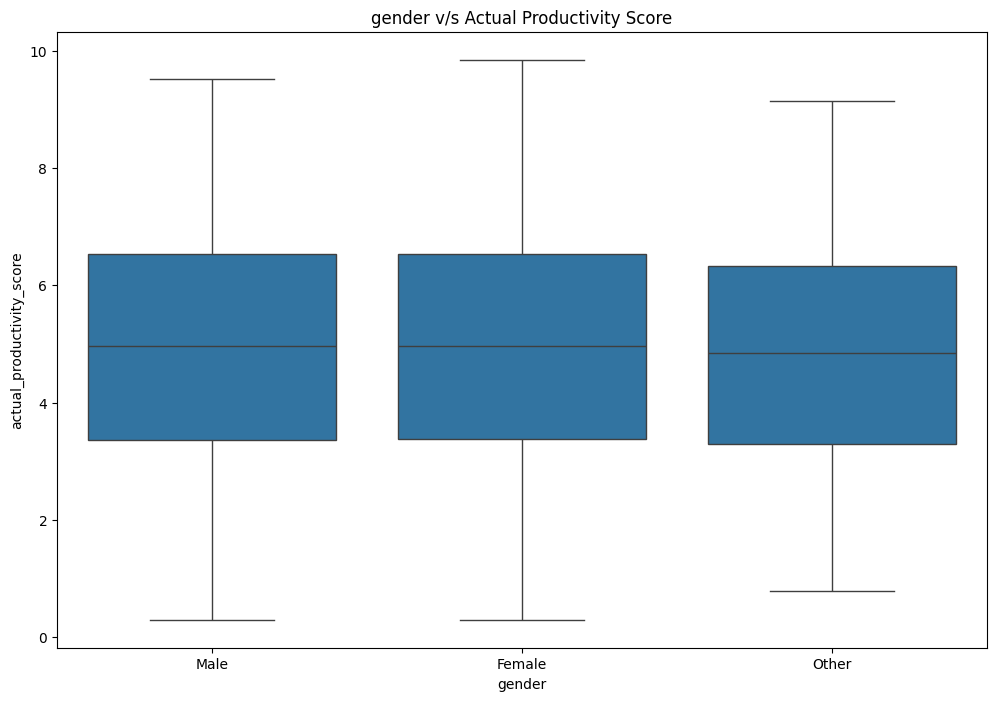

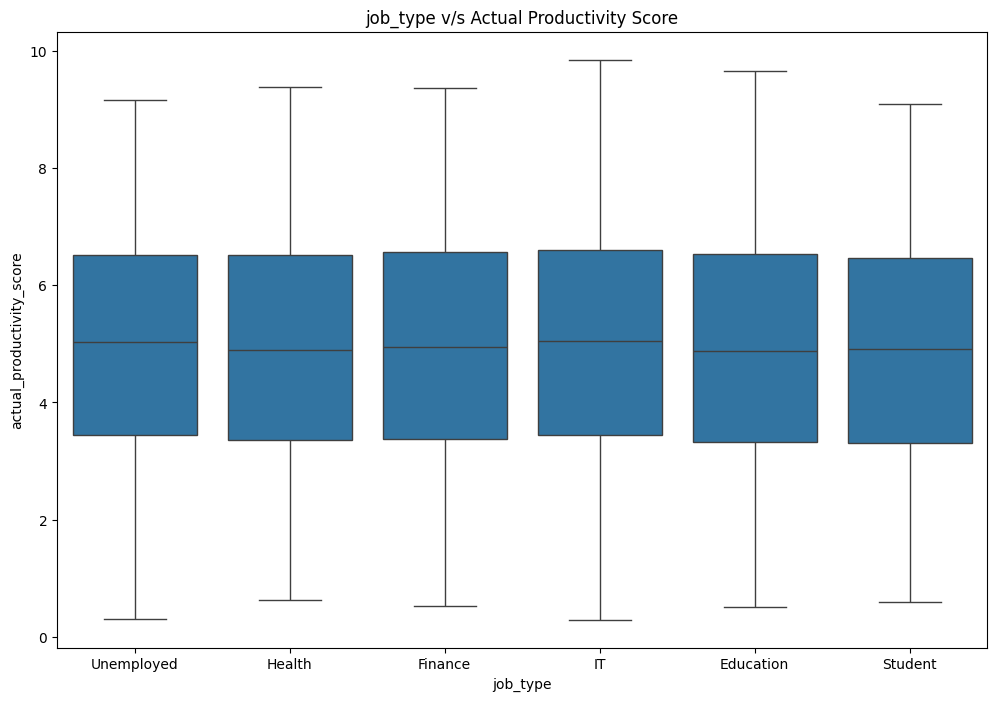

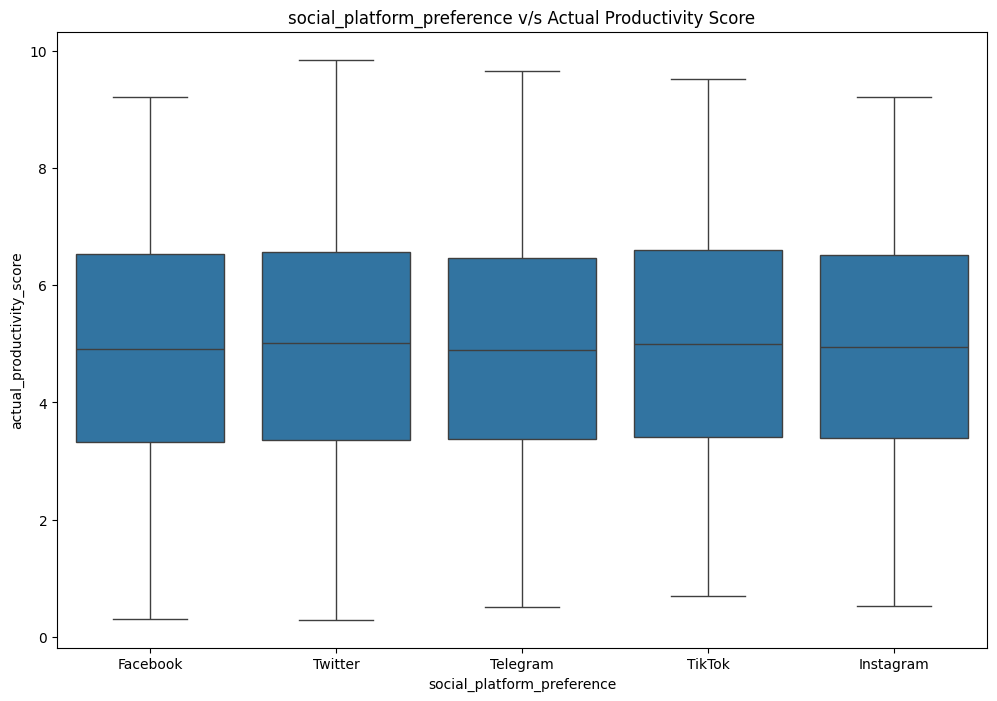

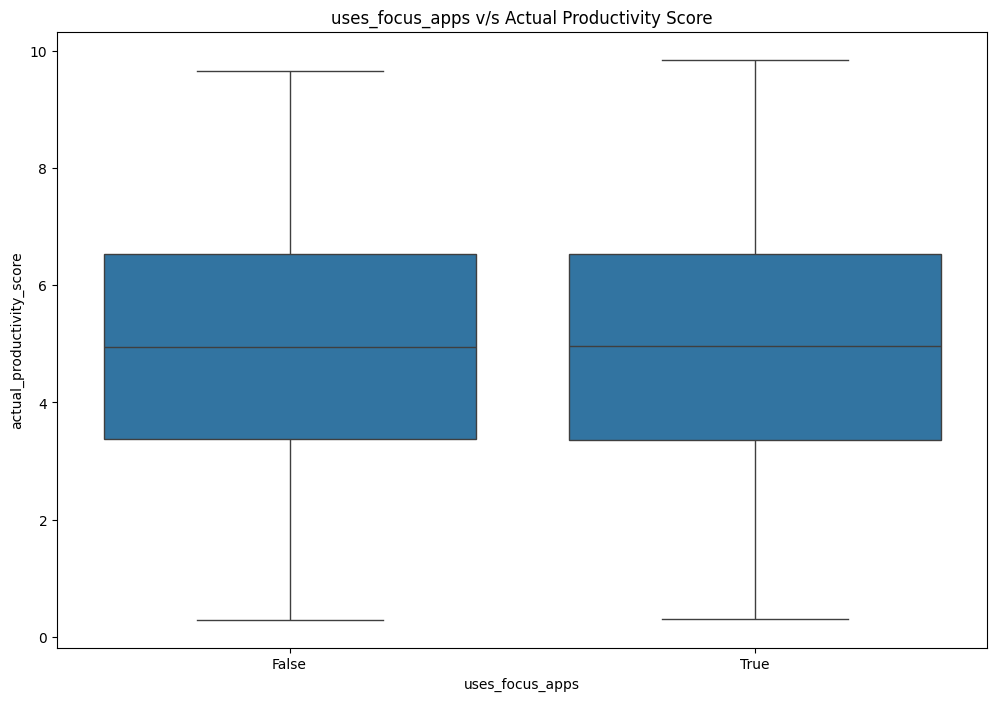

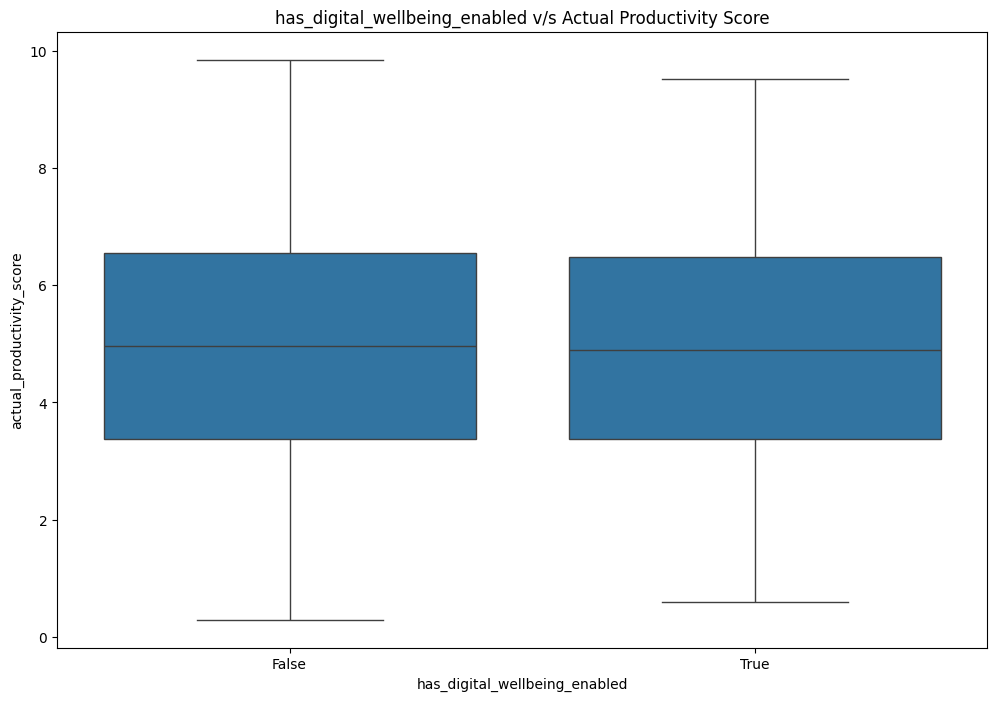

In [29]:
for col in non_num_cols:
    plt.figure(figsize = (12,8))
    sns.boxplot(df, x = col, y = 'actual_productivity_score')
    plt.title(f'{col} v/s Actual Productivity Score')

Observations:
- **Gender**: Females have a slightly higher productivity score, but it is almost negligible
- **Sector**: Descending order of productivity--> IT > Education > Finance > Unemployment > Student
- **Social Media Platform**: Descending order of productivity--> Twitter > Telegram > TikTok > Instagram > Facebook (Due to the nature of content on the platforms, which decreases in practicality as we move right)
- **Uses Focus Apps**: People who use focus apps have slightly higher productivity rate, but it is negligible due to being distracted after unlocking their phone
- **Has Digital Well-Being Enable**: People who have digital wellbeing enable have slightly higher productivity rate, but it is negligible due to being distracted after unlocking their phone

### Columns selected

In [58]:
imp_cols = ['age','daily_social_media_time', 'sleep_hours', 'job_type', 'social_platform_preference', 'breaks_during_work','coffee_consumption_per_day','weekly_offline_hours','days_feeling_burnout_per_month']
numImpCols = [col for col in imp_cols if df[col].dtype in ['int64', 'float64']]
nonNumImpCols = [col for col in imp_cols if df[col].dtype in ['object', 'bool']]

print(numImpCols)
print(nonNumImpCols)

['age', 'daily_social_media_time', 'sleep_hours', 'breaks_during_work', 'coffee_consumption_per_day', 'weekly_offline_hours', 'days_feeling_burnout_per_month']
['job_type', 'social_platform_preference']
